<a href="https://colab.research.google.com/github/rajbeniwal710/Spam_Classification_Model/blob/main/rnn_for_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**word2vec**


exploring pre-trained embeddings

In [5]:
import gensim.downloader as api

wiki_embedding = api.load("glove-wiki-gigaword-100")

KeyboardInterrupt: ignored

In [ ]:
#explore word2vec for king
wiki_embedding['king']

In [ ]:
#simillar words to king
wiki_embedding.most_similar('king')

training our own model

In [6]:
from google.colab import files

uploaded = files.upload()

Saving SMSSpamCollection.tsv to SMSSpamCollection.tsv


In [7]:
import pandas as pd
import gensim
import numpy as np
from sklearn.model_selection import train_test_split

In [8]:
data = pd.read_csv('SMSSpamCollection.tsv', sep = '\t')
data.columns = ['label', 'text']

In [9]:
data.head()

,label,text
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


In [10]:
#using gensim built in function to clean the data
data['clean_text'] = data['text'].apply(lambda x: gensim.utils.simple_preprocess(x))
data.head()

,label,text,clean_text
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, wkly, comp, to, win, fa, cup..."
1,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, don, think, he, goes, to, usf, he, lives..."
2,ham,Even my brother is not like to speak with me. ...,"[even, my, brother, is, not, like, to, speak, ..."
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[have, date, on, sunday, with, will]"
4,ham,As per your request 'Melle Melle (Oru Minnamin...,"[as, per, your, request, melle, melle, oru, mi..."


In [11]:
#train-test split
x_train, x_test, y_train, y_test = train_test_split(data['clean_text'], data['label'], test_size = 0.2)

In [12]:
#training the word2vec model
w2v_model = gensim.models.Word2Vec(x_train,
                                   size=100,
                                   window=5,
                                   min_count=2)

In [13]:
w2v_model.wv['king']

array([ 0.00274743,  0.02919736, -0.00385835,  0.01237887, -0.03504077,
        0.04691796, -0.00170503, -0.01158929,  0.01796314,  0.00853953,
        0.01671991, -0.02626564,  0.04935885, -0.0472213 ,  0.02630613,
        0.03663982, -0.01670656,  0.02115207,  0.01926427,  0.00355045,
       -0.00934728,  0.0240381 , -0.00390232,  0.00115035,  0.00829938,
       -0.01165353,  0.03301921, -0.0250031 , -0.00359081, -0.00210048,
        0.01112694,  0.03165878, -0.02400869, -0.00368253,  0.04610794,
       -0.02242428, -0.01322538,  0.00579505,  0.03190395,  0.02745578,
       -0.00784699, -0.01400845, -0.04473878, -0.01108318,  0.01000333,
        0.02048136,  0.01883327, -0.00479737,  0.03083412,  0.00368709,
       -0.0201199 , -0.01170805,  0.00859775, -0.00947058, -0.00137891,
       -0.02449361,  0.04368003, -0.00990932, -0.03307153,  0.00581224,
        0.0258472 ,  0.00401454,  0.03561646,  0.06658364, -0.00777037,
       -0.03367876, -0.00431344,  0.02507117,  0.03685949, -0.00

In [14]:
#words related to king based on our trained model
w2v_model.wv.most_similar('king')

[('mah', 0.9942885637283325),
 ('flower', 0.9942864179611206),
 ('pain', 0.9942793846130371),
 ('difficult', 0.9942505955696106),
 ('lovely', 0.9941973090171814),
 ('receive', 0.99415123462677),
 ('didnt', 0.9941442012786865),
 ('man', 0.9941124320030212),
 ('ppm', 0.9941015839576721),
 ('mins', 0.9940972328186035)]

In [15]:
#generate a list of words the word2vec model learned word vectors for
w2v_model.wv.index2word

['to',
 'you',
 'the',
 'and',
 'is',
 'in',
 'me',
 'it',
 'my',
 'for',
 'your',
 'of',
 'call',
 'that',
 'have',
 'on',
 'now',
 'are',
 'so',
 'can',
 'not',
 'but',
 'ur',
 'at',
 'or',
 'do',
 'we',
 'get',
 'be',
 'will',
 'if',
 'with',
 'no',
 'just',
 'this',
 'gt',
 'lt',
 'up',
 'how',
 'what',
 'when',
 'ok',
 'free',
 'go',
 'from',
 'out',
 'all',
 'll',
 'got',
 'know',
 'then',
 'good',
 'like',
 'he',
 'am',
 'was',
 'there',
 'time',
 'day',
 'its',
 'come',
 'love',
 'only',
 'send',
 'txt',
 'text',
 'want',
 'she',
 'need',
 'as',
 'one',
 'don',
 'by',
 'lor',
 'stop',
 'home',
 'today',
 'going',
 'about',
 'sorry',
 'see',
 'dont',
 'back',
 'tell',
 'still',
 'our',
 'reply',
 'mobile',
 'pls',
 'her',
 'any',
 'later',
 'da',
 'take',
 'hi',
 'phone',
 'new',
 'please',
 'been',
 'did',
 'they',
 'who',
 'think',
 'here',
 'week',
 'msg',
 're',
 'some',
 'dear',
 'him',
 'has',
 'well',
 'great',
 'an',
 'hope',
 'claim',
 'much',
 'happy',
 'hey',
 'oh',
 

In [16]:
#generate aggregated sentence vectors based on the word vectors for each of the word in the sentence
w2v_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in w2v_model.wv.index2word]) for ls in x_test])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [17]:
#is the length of the sentence different than the length the of sentence vector
for i, v in enumerate(w2v_vect):
  print(len(x_test.iloc[i]), len(v))

7 7
9 9
18 18
5 4
6 5
8 8
4 4
11 10
29 24
24 20
60 54
7 7
8 8
16 15
16 15
10 9
23 23
38 35
15 15
27 25
8 8
14 12
13 12
21 21
8 8
8 6
22 22
25 25
31 26
12 12
16 15
16 16
7 6
9 9
11 11
6 6
6 6
30 30
7 7
22 22
4 3
5 5
16 14
16 15
11 10
6 5
27 26
7 7
7 7
17 13
14 11
11 10
9 8
24 18
7 7
6 6
4 4
23 20
10 10
11 10
19 19
46 43
15 15
23 19
5 5
16 14
13 12
12 11
7 7
6 4
13 10
8 8
3 3
23 17
10 10
6 6
3 3
8 8
21 21
8 8
4 4
29 29
37 35
4 3
11 9
14 14
3 3
18 17
29 20
11 11
9 7
10 9
8 8
7 6
8 5
13 13
10 10
6 6
57 50
27 23
3 3
25 24
5 5
16 14
8 8
26 25
9 9
9 9
29 26
4 4
6 6
6 6
8 8
17 16
5 4
4 4
6 6
7 7
5 5
17 16
31 31
24 20
11 8
23 22
23 22
27 23
5 5
12 11
5 5
5 5
24 22
9 9
15 12
11 10
16 14
12 12
4 4
11 6
7 5
9 8
17 17
10 10
10 10
17 15
26 24
21 17
34 30
25 22
23 22
25 24
5 5
10 10
18 18
6 6
23 21
5 5
12 10
15 14
22 20
7 7
14 11
17 17
14 13
6 6
27 22
4 4
5 4
6 5
5 4
24 23
22 20
9 9
9 8
7 7
16 14
6 6
16 14
23 23
26 19
15 14
6 6
6 6
21 21
12 11
18 16
5 5
10 7
4 4
14 14
26 20
5 5
23 20
24 21
5 5
18 16


In [18]:
#computing sentence vector by averaging the word vector for the words contained in the sentence
w2v_vect_avg = []
for vect in w2v_vect:
  if len(vect) != 0:
    w2v_vect_avg.append(vect.mean(axis=0))
  else:
    w2v_vect_avg.append(np.zeros(100))

In [19]:
#is the length of the sentence is same as the length the of sentence vector
for i, v in enumerate(w2v_vect_avg):
  print(len(x_test.iloc[i]), len(v))

7 100
9 100
18 100
5 100
6 100
8 100
4 100
11 100
29 100
24 100
60 100
7 100
8 100
16 100
16 100
10 100
23 100
38 100
15 100
27 100
8 100
14 100
13 100
21 100
8 100
8 100
22 100
25 100
31 100
12 100
16 100
16 100
7 100
9 100
11 100
6 100
6 100
30 100
7 100
22 100
4 100
5 100
16 100
16 100
11 100
6 100
27 100
7 100
7 100
17 100
14 100
11 100
9 100
24 100
7 100
6 100
4 100
23 100
10 100
11 100
19 100
46 100
15 100
23 100
5 100
16 100
13 100
12 100
7 100
6 100
13 100
8 100
3 100
23 100
10 100
6 100
3 100
8 100
21 100
8 100
4 100
29 100
37 100
4 100
11 100
14 100
3 100
18 100
29 100
11 100
9 100
10 100
8 100
7 100
8 100
13 100
10 100
6 100
57 100
27 100
3 100
25 100
5 100
16 100
8 100
26 100
9 100
9 100
29 100
4 100
6 100
6 100
8 100
17 100
5 100
4 100
6 100
7 100
5 100
17 100
31 100
24 100
11 100
23 100
23 100
27 100
5 100
12 100
5 100
5 100
24 100
9 100
15 100
11 100
16 100
12 100
4 100
11 100
7 100
9 100
17 100
10 100
10 100
17 100
26 100
21 100
34 100
25 100
23 100
25 100
5 100
10 100


__

doc2vec

In [20]:
#creating tagged document object to prepare to train the model
tagged_docs = [gensim.models.doc2vec.TaggedDocument(v,[i]) for i, v in enumerate(x_train)]

In [21]:
tagged_docs[0]

TaggedDocument(words=['where', 'are', 'you', 'what', 'do', 'you', 'do', 'how', 'can', 'you', 'stand', 'to', 'be', 'away', 'from', 'me', 'doesn', 'your', 'heart', 'ache', 'without', 'me', 'don', 'you', 'wonder', 'of', 'me', 'don', 'you', 'crave', 'me'], tags=[0])

In [22]:
#training  a basic doc3vec model
d2v_model = gensim.models.Doc2Vec(tagged_docs,
                                  vector_size=100,
                                  window=5,
                                  min_count=2)

In [23]:
##need to pass a string of words 
#for example
d2v_model.infer_vector(['hi','all','good'])

array([-2.4561596e-03,  7.3012146e-03,  3.6153270e-04, -5.9192622e-04,
       -2.5984400e-03,  5.3434949e-03,  5.2694039e-04,  4.1780518e-03,
        5.8592749e-03, -3.5537970e-03,  2.5544891e-03, -1.1604918e-03,
        1.3646263e-03, -8.7221228e-03, -1.7382514e-03,  3.4734029e-03,
        9.6258352e-04,  3.6502422e-03, -1.5646717e-04,  3.2324740e-03,
        3.7270345e-04,  9.1758155e-04,  3.5960467e-03, -2.3568945e-03,
        4.6950458e-03,  2.0438472e-03,  6.5861782e-03,  3.0200556e-03,
        2.7155869e-03,  1.6794428e-03,  4.6463176e-03, -1.6197740e-03,
       -7.3685143e-03,  3.5582304e-03,  1.8907872e-03,  2.0025470e-03,
        5.9647410e-04,  4.6093464e-03,  1.3608102e-03, -4.8329419e-04,
        4.1654683e-03, -3.2790874e-03, -1.4645096e-04,  1.5149877e-03,
       -7.0027512e-04,  3.9023382e-03, -1.0705669e-03,  4.5180842e-04,
        5.4234890e-03,  3.2186210e-03, -3.8347819e-03, -1.6232900e-03,
        1.9131795e-03,  5.2401441e-04, -4.8477971e-03, -5.2822835e-04,
      

In [24]:
#preparing doc2vec vectors for machine learning models
vector = [[d2v_model.infer_vector(words)] for words in x_test]


Implementing a basic RNN

In [25]:
labels = np.where(data['label'] == 'spam',1 , 0 )
#train-test split
x_train, x_test, y_train, y_test = train_test_split(data['text'], labels, test_size = 0.2)

In [27]:
#import modules
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [28]:
#fit the tokeenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

In [29]:
#using the tokenizer to transform the text messages in the trainig and test sets
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

In [30]:
#integer representation of first message
x_train_seq[0]

[147,
 25,
 20,
 3,
 140,
 10,
 1442,
 147,
 37,
 20,
 46,
 53,
 95,
 276,
 1681,
 19,
 478,
 15,
 445,
 511,
 14,
 2614,
 10,
 197,
 5,
 2615,
 3,
 96,
 3822,
 47,
 2024,
 1,
 1442,
 197,
 11,
 85,
 85,
 170]

In [32]:
#strandize the length of datasets
x_train_padded = pad_sequences(x_train_seq, 50)
x_test_padded = pad_sequences(x_test_seq,50)

In [33]:
x_train_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,  147,   25,   20,    3,  140,   10, 1442,  147,   37,   20,
         46,   53,   95,  276, 1681,   19,  478,   15,  445,  511,   14,
       2614,   10,  197,    5, 2615,    3,   96, 3822,   47, 2024,    1,
       1442,  197,   11,   85,   85,  170], dtype=int32)

In [34]:
#importing the required modeules and writing functions to calculate recall and precision
import keras.backend as k
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

def recall_(y_true, y_pred):
  true_positive = k.sum(k.round(k.clip(y_true * y_pred, 0, 1)))
  possible_positive = k.sum(k.round(k.clip(y_true, 0, 1)))
  recall = true_positive / (possible_positive + k.epsilon())
  return recall

def precision_(y_true, y_pred):
  true_positive = k.sum(k.round(k.clip(y_true * y_pred, 0, 1)))
  predicted_positive = k.sum(k.round(k.clip(y_pred, 0, 1)))
  precision = true_positive / (predicted_positive + k.epsilon())
  return precision

In [42]:
#construct the architecture of the model
model = Sequential()
model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(LSTM(32,dropout=0,recurrent_dropout=0))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          256928    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 266,337
Trainable params: 266,337
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',precision_,recall_])

In [44]:
model_fit = model.fit(x_train_padded,y_train,batch_size=32,epochs=10,
                      validation_data=(x_test_padded,y_test))

Epoch 1/10
140/140 [==============================] - 7s 30ms/step - loss: 0.4045 - accuracy: 0.8778 - precision_: 0.1898 - recall_: 0.1413 - val_loss: 0.0791 - val_accuracy: 0.9776 - val_precision_: 0.9810 - val_recall_: 0.8515
Epoch 2/10
140/140 [==============================] - 4s 25ms/step - loss: 0.0413 - accuracy: 0.9907 - precision_: 0.9736 - recall_: 0.9445 - val_loss: 0.0452 - val_accuracy: 0.9883 - val_precision_: 0.9895 - val_recall_: 0.9256
Epoch 3/10
140/140 [==============================] - 4s 25ms/step - loss: 0.0104 - accuracy: 0.9969 - precision_: 0.9952 - recall_: 0.9833 - val_loss: 0.0493 - val_accuracy: 0.9910 - val_precision_: 1.0000 - val_recall_: 0.9292
Epoch 4/10
140/140 [==============================] - 4s 25ms/step - loss: 0.0016 - accuracy: 0.9998 - precision_: 0.9984 - recall_: 0.9997 - val_loss: 0.0627 - val_accuracy: 0.9892 - val_precision_: 1.0000 - val_recall_: 0.9199
Epoch 5/10
140/140 [==============================] - 4s 26ms/step - loss: 7.2042e-0

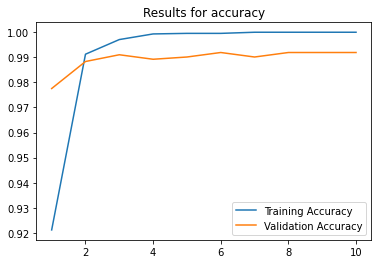

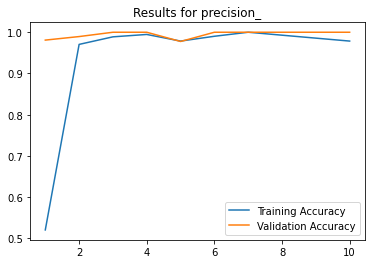

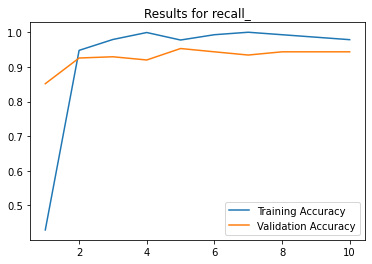

In [47]:
#plotting the evaluation metrics 
import matplotlib.pyplot as plt

for i in ['accuracy','precision_','recall_']:
  acc = model_fit.history[i]
  val_acc = model_fit.history['val_{}'.format(i)]
  epochs = range(1,len(acc)+1)

  plt.figure()
  plt.plot(epochs,acc,label='Training Accuracy')
  plt.plot(epochs,val_acc,label='Validation Accuracy')
  plt.title('Results for {}'.format(i))
  plt.legend()
  plt.show()